Building an EPL Match Predictor

Loading the dataset

In [320]:
import pandas as pd
data = pd.read_csv('matches.csv')
data.sample(10)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
832,16,2020-12-21,20:00,Premier League,Matchweek 14,Mon,Away,L,0.0,3.0,...,Match Report,NaN,6.0,0.0,12.6,0.0,0.0,0.0,2021,West Ham United
1088,4,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,1.0,0.0,...,Match Report,NaN,14.0,5.0,18.4,1.0,0.0,0.0,2021,Wolverhampton Wanderers
295,47,2022-04-17,14:15,Premier League,Matchweek 33,Sun,Away,L,1.0,2.0,...,Match Report,NaN,8.0,2.0,16.0,0.0,0.0,0.0,2022,Leicester City
748,8,2020-10-24,17:30,Premier League,Matchweek 6,Sat,Away,D,0.0,0.0,...,Match Report,NaN,6.0,1.0,19.5,0.0,0.0,0.0,2021,Chelsea
779,56,2021-05-18,20:15,Premier League,Matchweek 37,Tue,Home,W,2.0,1.0,...,Match Report,NaN,16.0,5.0,14.5,0.0,1.0,1.0,2021,Chelsea
772,43,2021-04-03,12:30,Premier League,Matchweek 30,Sat,Home,L,2.0,5.0,...,Match Report,NaN,18.0,7.0,15.2,2.0,0.0,0.0,2021,Chelsea
131,0,2021-08-14,12:30,Premier League,Matchweek 1,Sat,Home,W,5.0,1.0,...,Match Report,NaN,16.0,8.0,18.0,0.0,0.0,0.0,2022,Manchester United
751,13,2020-11-21,12:30,Premier League,Matchweek 9,Sat,Away,W,2.0,0.0,...,Match Report,NaN,14.0,3.0,18.0,0.0,0.0,0.0,2021,Chelsea
134,3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,1.0,...,Match Report,NaN,21.0,6.0,20.3,0.0,0.0,0.0,2022,Manchester United
934,2,2020-09-19,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,3.0,...,Match Report,NaN,9.0,6.0,16.1,1.0,1.0,1.0,2021,Leeds United


In [321]:
data.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [322]:
predict_data = data[['time', 'team', 'opponent', 'round', 'day', 'venue', 'result']]
predict_data.sample(10)

,time,team,opponent,round,day,venue,result
939,20:00,Leeds United,Leicester City,Matchweek 7,Mon,Home,L
1042,14:05,Aston Villa,Manchester Utd,Matchweek 35,Sun,Home,L
234,15:00,Newcastle United,Southampton,Matchweek 3,Sat,Home,D
125,19:30,Tottenham Hotspur,Brighton,Matchweek 16,Wed,Away,W
171,14:00,West Ham United,Brentford,Matchweek 7,Sun,Home,L
255,12:30,Newcastle United,West Ham,Matchweek 26,Sat,Away,D
186,14:00,West Ham United,Leeds United,Matchweek 22,Sun,Home,L
970,16:00,Leeds United,West Brom,Matchweek 38,Sun,Home,W
1190,12:00,Southampton,Burnley,Matchweek 30,Sun,Home,W
623,19:30,Norwich City,Chelsea,Matchweek 30,Thu,Home,L


Cleaning the data

In [323]:
predict_data.dtypes

time        object
team        object
opponent    object
round       object
day         object
venue       object
result      object
dtype: object

In [324]:
predict_data[predict_data.isnull().any(axis=1)]

,time,team,opponent,round,day,venue,result


In [325]:
predict_data['time'] = predict_data['time'].str.replace(':.+', '', regex=True).astype(int)
predict_data.dtypes

C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_10188/956915218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['time'] = predict_data['time'].str.replace(':.+', '', regex=True).astype(int)


time         int32
team        object
opponent    object
round       object
day         object
venue       object
result      object
dtype: object

In [326]:
def set_value(row_number, assigned_value):
	return assigned_value[row_number]

event_dictionary ={'L' : 0, 'D' : 1, 'W' : 1}

predict_data['result'] = predict_data['result'].apply(set_value, args =(event_dictionary, ))

predict_data.sample(10)

C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_10188/530418060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['result'] = predict_data['result'].apply(set_value, args =(event_dictionary, ))


,time,team,opponent,round,day,venue,result
567,15,Watford,Norwich City,Matchweek 5,Sat,Away,1
933,17,Leeds United,Liverpool,Matchweek 1,Sat,Away,0
1264,12,Burnley,Arsenal,Matchweek 27,Sat,Home,1
1000,20,Everton,Brighton,Matchweek 31,Mon,Away,1
451,14,Aston Villa,Brentford,Matchweek 21,Sun,Away,0
1110,20,Wolverhampton Wanderers,Newcastle Utd,Matchweek 26,Sat,Away,1
831,20,West Ham United,Crystal Palace,Matchweek 13,Wed,Home,1
1240,17,Burnley,West Brom,Matchweek 5,Mon,Away,1
596,17,Norwich City,Liverpool,Matchweek 1,Sat,Home,0
513,20,Burnley,Manchester Utd,Matchweek 20,Thu,Away,0


In [327]:
predict_data['round'] = predict_data['round'].str.replace('Matchweek ', '', regex=True).astype(int)
predict_data.dtypes

C:\Users\MANDEE~1\AppData\Local\Temp/ipykernel_10188/330717814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['round'] = predict_data['round'].str.replace('Matchweek ', '', regex=True).astype(int)


time         int32
team        object
opponent    object
round        int32
day         object
venue       object
result       int64
dtype: object

Split the data

In [328]:
features = ['time', 'team', 'opponent', 'round', 'day', 'venue']
label = ['result']
X, y = predict_data[features].values, predict_data[label].values

In [329]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Preprocess the data

In [330]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [331]:
categorical_features = [1,2,4,5]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder = 'passthrough'
)

Define parameters

In [332]:
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# max_features = ['auto', 'sqrt']
# max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# min_samples_leaf = [1, 2, 3, 4]
# bootstrap = [True, False]
# criterion=['gini', 'entropy']
# random_grid = {'clf__n_estimators': n_estimators,
#                'clf__max_features': max_features,
#                'clf__max_depth': max_depth,
#                'clf__min_samples_split': min_samples_split,
#                'clf__min_samples_leaf': min_samples_leaf,
#                'clf__bootstrap': bootstrap,
#                'clf__criterion': criterion}

In [333]:
# from sklearn.model_selection import GridSearchCV

# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# penalty = ['none', 'l1', 'l2', 'elasticnet']
# C = [100, 10, 1.0, 0.1, 0.01]

# grid = {'clf__solver': solver,
#         'clf__penalty': penalty,
#         'clf__C': C}

Create pipeline and train the model

In [334]:
# reg = 0.01
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('clf', RandomForestClassifier(n_estimators=2171, min_samples_split=15, min_samples_leaf=4, max_features='auto',
#                                                         max_depth=150, criterion='gini', bootstrap=True))])

In [335]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clf', LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [336]:
# search = RandomizedSearchCV(estimator=pipeline, 
#                             param_distributions=random_grid,
#                             n_iter=30,
#                             cv=5,
#                             verbose=2,
#                             random_state=42,
#                             n_jobs=1)
# search.fit(X_train, y_train)
# print(search.best_params_)

Results from RandomForestClassifier RandomizedSearchCV:
{'clf__n_estimators': 2171, 'clf__min_samples_split': 15, 'clf__min_samples_leaf': 4, 'clf__max_features': 'auto', 'clf__max_depth': 150, 'clf__criterion': 'gini', 'clf__bootstrap': True}

In [337]:
# search = GridSearchCV(estimator=pipeline,
#                      param_grid=grid,
#                      n_jobs=-1,
#                      scoring='accuracy',
#                      error_score=0)
# search.fit(X_train, y_train)
# print(search.best_params_)

Results from LinearRegression GridSearchCV for 3 classes:
{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'sag'}
(C=0.1, penalty='l2', solver='sag')

Results from LinearRegression GridSearchCV for 2 classes:
{'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
(C=1, penalty='l1', solver='liblinear')

In [338]:
model = pipeline.fit(X_train, y_train)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predict new labels and evaluate model

In [339]:
predictions = model.predict(X_test)

In [340]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.36      0.44       171
           1       0.65      0.83      0.73       246

    accuracy                           0.63       417
   macro avg       0.62      0.59      0.58       417
weighted avg       0.62      0.63      0.61       417



[[ 61 110]
 [ 43 203]]


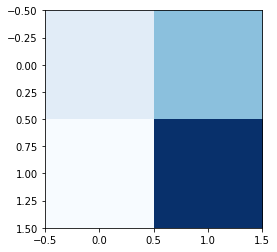

In [341]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

In [342]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probability = model.predict_proba(X_test)
auc = roc_auc_score(y_test, probability[:,1])
print(auc)

0.6998526125612133


Save the model

In [343]:
import joblib
filename = 'EPL_model'
joblib.dump(model, filename)

['EPL_model']

Predict new data

In [345]:
loaded_model = joblib.load('EPL_model')

new_data = np.array([[12.0, 'Liverpool', 'Chelsea', 21.0, 'Sat', 'Home']])

predictions = loaded_model.predict(new_data)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.